## Sieci interakcji postaci w serialu HBO „Gra o tron”
Pary postaci są połączone (nieukierunkowanymi) krawędziami ważonymi liczbą interakcji.

Istnieje pięć rodzajów interakcji. Postać A i Postać B są połączone, gdy:

1. Postać A mówi bezpośrednio po Postać B
2. Postać A mówi o postaci B
3. Postać C mówi o postaci A i postaci B
4. Postać A i postać B są wymienione w tym samym kierunku scenicznym
5. Postać A i postać B pojawiają się razem w scenie


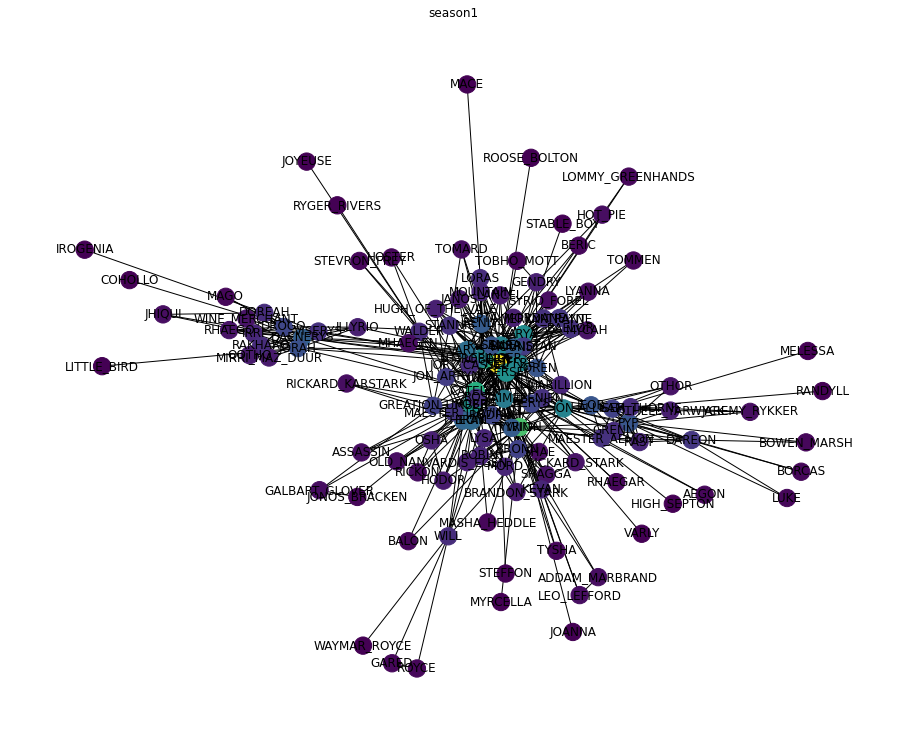

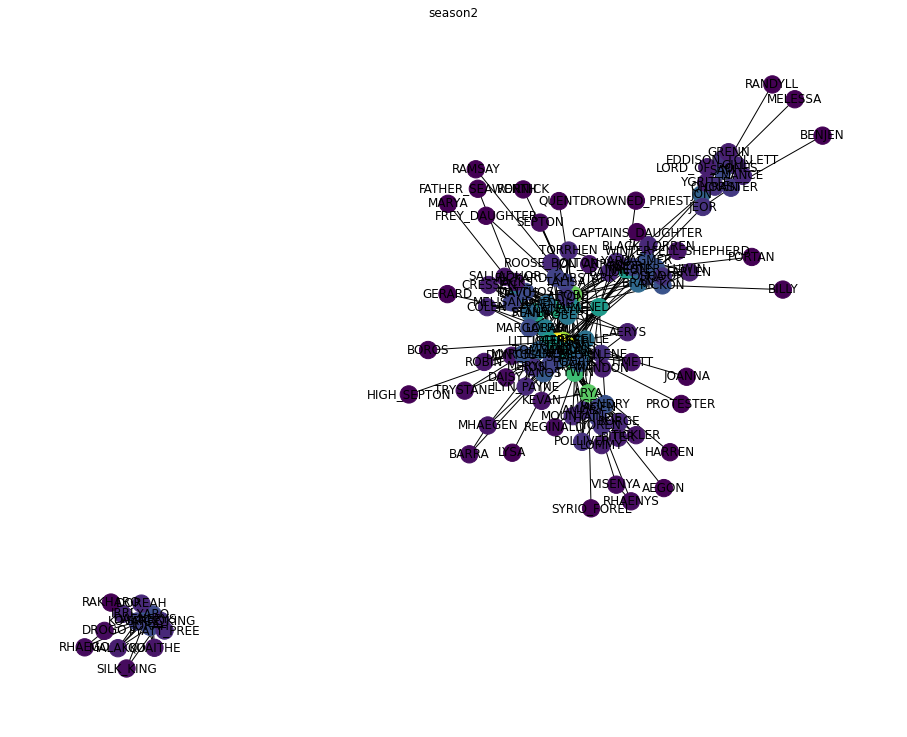

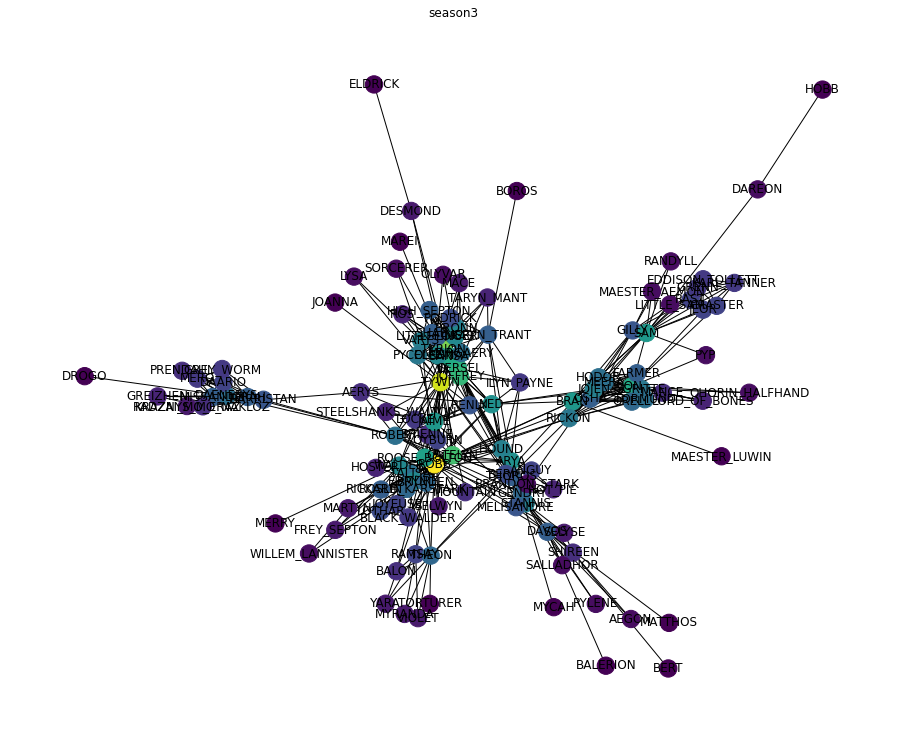

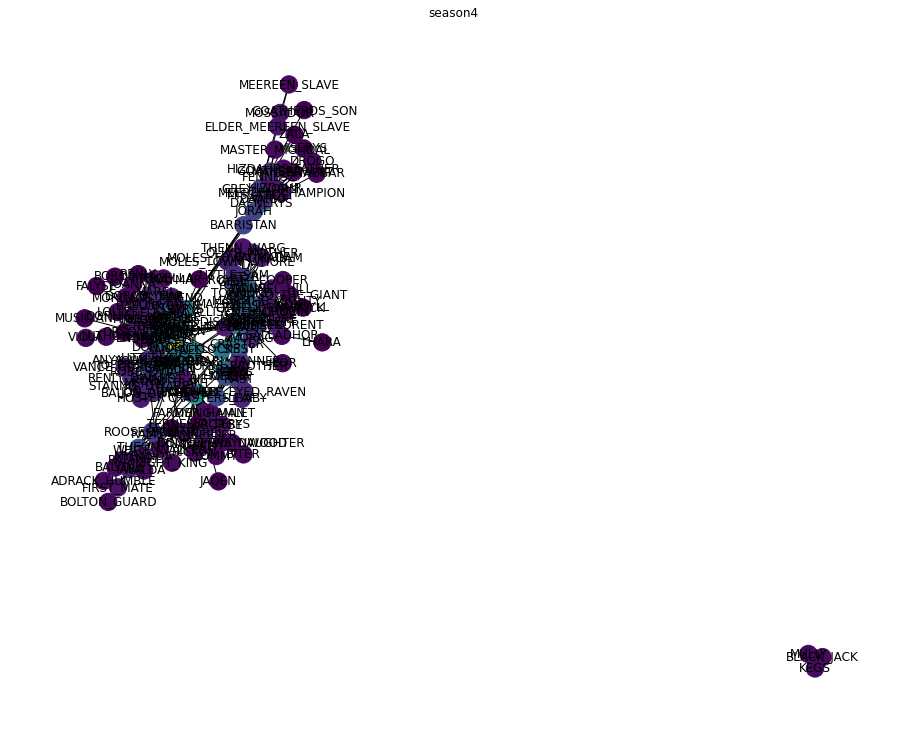

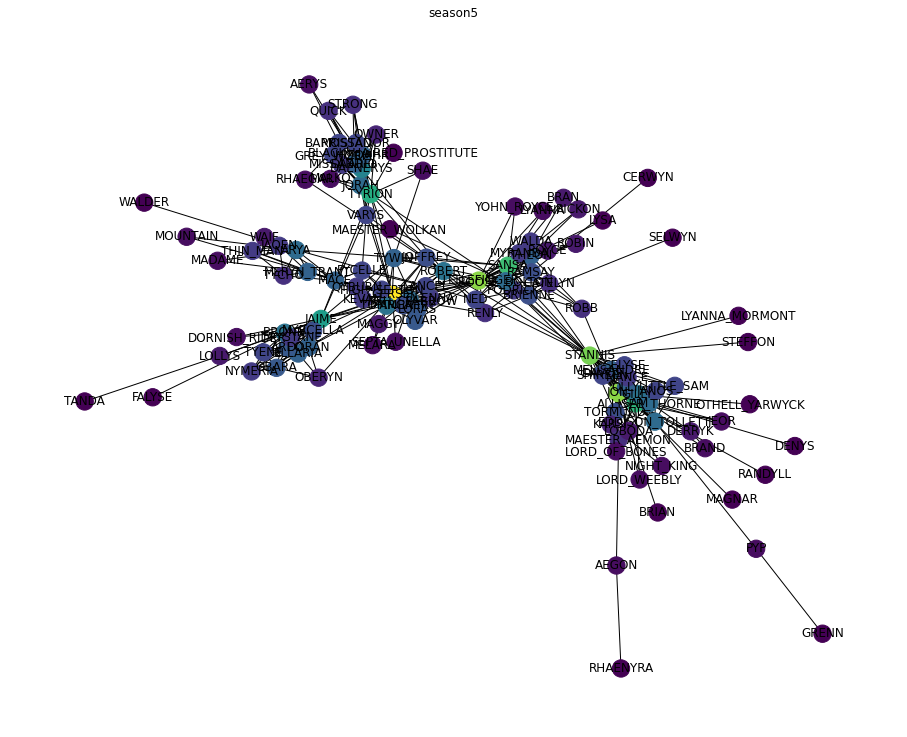

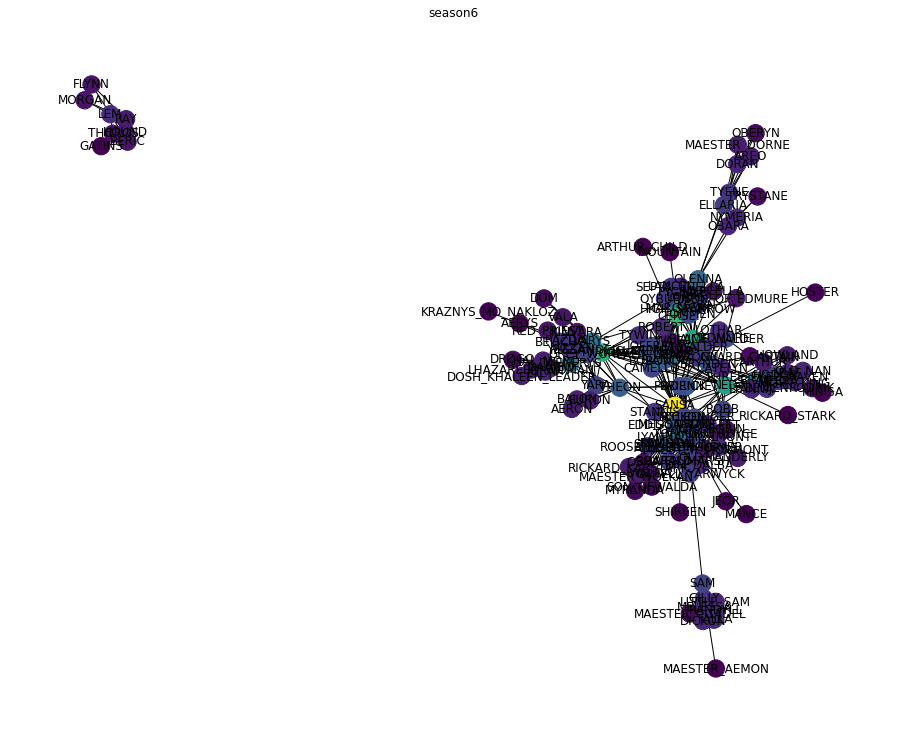

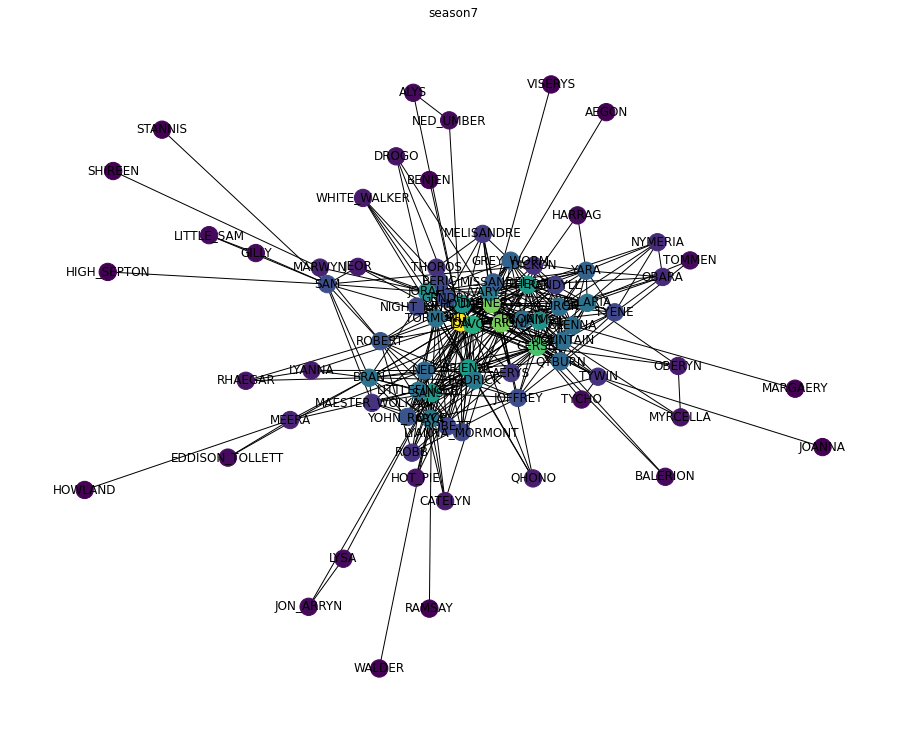

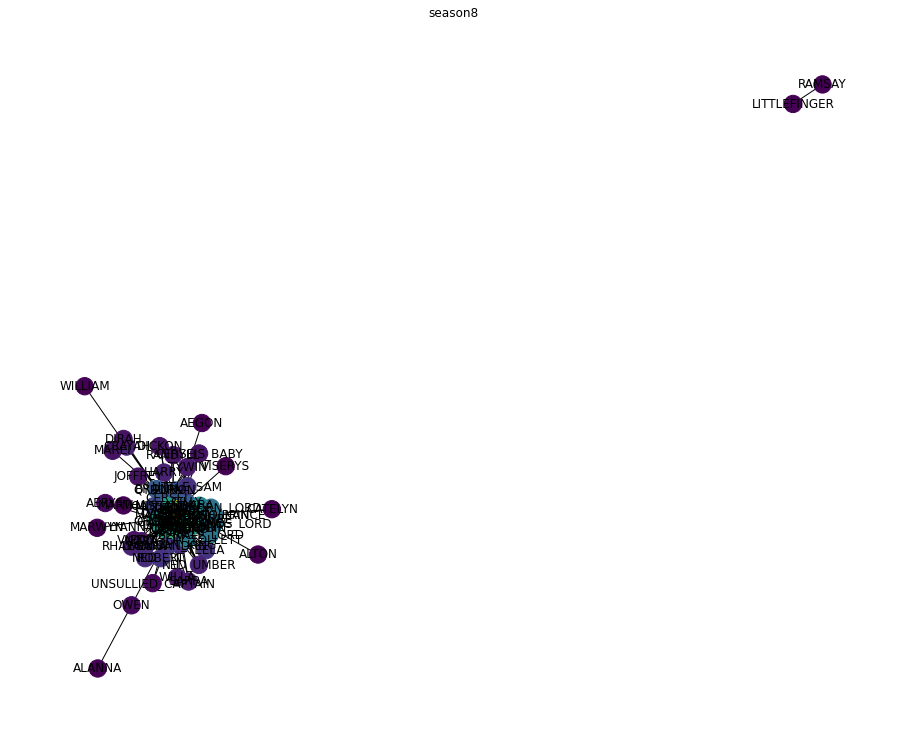

In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
seasons={}
people={}
all_people=[]
files=[]
for i in range(1,9):
    filename ="got-s"+str(i)+"-edges.csv"
    files.append(filename)
    lines = [line.split(':') for line in open(filename,'r', encoding='utf-8')]
    seasons[i]=[]
    people[i]=[]
    for line in lines:
        key = line[0].strip().split(',')
        seasons[i].append((key[0],key[1],key[2]))
        if key[0] not in people[i]:
            people[i].append(key[0])
        if key[1] not in people[i]:
            people[i].append(key[1])
        if key[0] not in all_people:
            all_people.append(key[0])
        if key[1] not in all_people:
            all_people.append(key[1])
    people[i].remove('Source')
    people[i].remove('Target')
    all_people.remove('Source')
    all_people.remove('Target')
    seasons[i].remove(('Source', 'Target', 'Weight'))
    plt.figure(figsize=(16,13)) 
    plt.title("season"+str(i))
    G=nx.Graph()
    G.add_nodes_from(people[i])
    G.add_weighted_edges_from(seasons[i])
    dcent = nx.degree_centrality(G)
    pos = nx.spring_layout(G)
    dcent_color = [i for i in dcent.values()]
    nx.draw(G, with_labels=True, pos=pos, node_color=dcent_color)
    #net = Network('100%', '100%',bgcolor="#222222", font_color="white")
    #net.from_nx(G)
    #net.show("season"+str(i)+".html")